# Analysis and prediction of Crime data as it relates to weather conditions in the city of San Francisco

- Jim Haskin

- GA-Data Science
- Dec 2015

- 2/17/2016

## Hypothisis
It is often said that people lose their temper more when it is hot out and that all the crazies come out when there is a full moon. But does the data prove these hunches are true? 
If it is true, can we look at the weather forcast for the next week and predict if the number or intensity of Police Incidents will be higher or lower than usual?

## Method
Crime Data
- I have collected the incident reports of the San Franciso Police Department from the SF OpenData website. https://data.sfgov.org/data?category=Public%20Safety. I have the records from January, 2003 until the beginning of 2016.
- I summerized the report to generate a daily report of the number of incidents and another factor I am calling Crime Level. Each incident is given a score based on how violent it is. Murders and assaults are rated high. Traffic violations and non-criminal incidents are rated low. These scores are summed and then normalized to a scale of 0 - 10.
- This was done in the `'2_clean_data_sf_crime'` notebook.
- Data written to file. `'sf_crime_clean.csv'`

Weather Data
- I collected historical weather data for the San Franciso area from January 2003 until December 2015. The data comes from Weather Underground. http://www.wunderground.com/history/
- To that data I added new features, such as the phase of the moon, that I wanted to investigate.
- This was done in the `'3_clean_weather_combine_with_crime'` notebook.
- Data written to file. `'sf_crime_weather.csv'`

Analysis and Modeling
- I looked at the crime levels as it related to different features to get a general idea of what features are important.
- Removed fields that are not in the Forecast Data that will be used for prediction.
- Build Model.......
- ...........

Prediction
- I used the WeatherUnderground API and the OpenWeatherMap API to retreive the forecast for the next 10 days in San Fransico.
- To this I added in the other relavent features such as Moon Phase.
- This is done in the `'8_get_weather_forcast'` notebook.
- Data is written to file. `'forecast_10day.csv'`
- This new data is then run throught the model to predict the general level of crime for the next 10 days.

## Sections


- [Data Source](#Data-source)
- [Clean Features](#Clean-Features)
- [Plot Data](#Plot-Data)
- [Observations/Actions](#Observations/Actions)
- [qq](#qq)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# use fivethirtyeight style for all graphics
plt.style.use('fivethirtyeight')

## Data source

[[back to top](#Sections)]

Data was consolidated in these two Notebooks
- 2_clean_data_sf_crime.ipynb | Data downloaded from SF Open Data site. 
- 3_clean_weather_combine_with_crime.ipynb | Data downloaded from WeatherUnderground.com
- Final file name 'sf_crime_weather.csv'


FieldName|Type|Description                             
---------------|------------|---------------------
Index:Date|DateTime|2003-01-01 to 2015-12-31
crime_level_sum|int64|Calculated Crime Level for the day
crime_level_count|int64|Number of incidents for the day
crime_level|float64|Crime level scaled to 0-10
weather_crime_level|float64|Crimes influenced by weather level scaled to 0-10
dayofweek|object|Day of the week in string format
day|int64|Day of month in numeric
month|int64|Month of year in numeric
year|int64|Year in numeric
temp_max|int64|High Temperature for the day in degrees F
temp_mean|int64|Mean Temperature for the day in degrees F
temp_min|int64|Low Temperature for the day in degrees F
temp_delta|int64|Temperature change for the day in degrees F
dew_point_max|int64|High Dew Point for the day in degrees F
dew_point_mean|int64|Mean Dew Point for the day in degrees F
dew_point_min|int64|Low Dew Point for the day in degrees F
humidity_max|int64|Maximum Humidity for the day in percentage
humidity_mean|int64|Mean Humidity for the day in percentage
humidity_min|int64|Minimum Humidity for the day in percentage
sl_pressure_max|float64|High Sea Level for the day in inches
sl_pressure_mean|float64|Mean Sea Level for the day in inches
sl_pressure_min|float64|Low Sea Level for the day in inches
wind_speed_max|int64|Maximum maintained Wind Speed in mph
wind_speed_mean|int64|Mean maintained Wind Speed in mph
wind_max_gust|float64|Maximum Wind Gust in mph
precipitation|float64|Amount is precipitation in inches
cloud_cover|int64|Cloud Cover in percentage
events|object|Significant Events such as 'Rain', 'Fog'
wind_direction|int64|General wind direction, numeric 0 359
sun_length|float64|Number of minutes of Sun on day
moon_phase|float64|Phase moon is in. 0.5 = full moon
sun_units|float64|the minutes of Sun scaled by the cloud cover percentage


## Read in combined Data and investigate

In [2]:
data = pd.read_csv('sf_crime_weather.csv', index_col=0)
data.head(5)

,crime_level_sum,crime_level_count,weather_crime_sum,v_word_sum,gun_sum,dayofweek,day,month,year,end_of_week,...,events,wind_direction,rain,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
2003-01-01,1066,541,143,131,5,wednesday,1,1,2003,False,...,No,86,False,578.733333,0.950084,364.602000,48,52,160.246207,75.602722
2003-01-02,750,411,72,52,1,thursday,2,1,2003,False,...,No,79,False,579.400000,0.983944,220.172000,50,54,174.834219,79.559031
2003-01-03,799,440,84,60,0,friday,3,1,2003,True,...,No,56,False,580.100000,0.017763,290.050000,50,55,165.091411,77.938166
2003-01-04,674,347,65,58,3,saturday,4,1,2003,True,...,Fog,295,False,580.866667,0.051546,290.433333,52,57,203.511400,86.591989
2003-01-05,755,377,102,71,2,sunday,5,1,2003,True,...,Fog,22,False,581.700000,0.085328,290.850000,52,55,220.937501,89.274978


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4722 entries, 2003-01-01 to 2015-12-31
Data columns (total 40 columns):
crime_level_sum        4722 non-null int64
crime_level_count      4722 non-null int64
weather_crime_sum      4722 non-null int64
v_word_sum             4722 non-null float64
gun_sum                4722 non-null float64
dayofweek              4722 non-null object
day                    4722 non-null int64
month                  4722 non-null int64
year                   4722 non-null int64
end_of_week            4722 non-null bool
crime_level            4722 non-null float64
weather_crime_level    4722 non-null float64
temp_max               4722 non-null int64
temp_mean              4722 non-null int64
temp_min               4722 non-null int64
temp_delta             4722 non-null int64
dew_point_max          4722 non-null int64
dew_point_mean         4722 non-null float64
dew_point_min          4722 non-null int64
humidity_max           4722 non-null int64
humidity_mean

### Observations
- Much of the data was cleaned in the previous work.
- There are 4744 obsevations.
- The only values missing are ~10% of the Maximum Wind Gust feature. NOTE: (May not be needed)
- The catagorical need to be typed.


## Clean Features
[[back to top](#Sections)]

### Catagoricals

In [4]:
#data['events'].fillna('No', inplace=True)
data['events'] = data['events'].astype('category')
data['dayofweek'] = data['dayofweek'].astype('category')
data['end_of_week'] = data['end_of_week'].astype('category')
data['rain'] = data['rain'].astype('category')

data['day'] = data['day'].astype('category')
data['month'] = data['month'].astype('category')
data['year'] = data['year'].astype('category')
dworder = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday','friday', 'saturday']
#qq = data['dayofweek'].reorder_categories(dworder)
#qq.counts()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4722 entries, 2003-01-01 to 2015-12-31
Data columns (total 40 columns):
crime_level_sum        4722 non-null int64
crime_level_count      4722 non-null int64
weather_crime_sum      4722 non-null int64
v_word_sum             4722 non-null float64
gun_sum                4722 non-null float64
dayofweek              4722 non-null category
day                    4722 non-null category
month                  4722 non-null category
year                   4722 non-null category
end_of_week            4722 non-null category
crime_level            4722 non-null float64
weather_crime_level    4722 non-null float64
temp_max               4722 non-null int64
temp_mean              4722 non-null int64
temp_min               4722 non-null int64
temp_delta             4722 non-null int64
dew_point_max          4722 non-null int64
dew_point_mean         4722 non-null float64
dew_point_min          4722 non-null int64
humidity_max           4722 non-null int6

In [6]:
data.describe()

,crime_level_sum,crime_level_count,weather_crime_sum,v_word_sum,gun_sum,crime_level,weather_crime_level,temp_max,temp_mean,temp_min,...,precipitation,cloud_cover,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
count,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,...,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000,4722.000000
mean,732.414655,391.175985,79.524354,60.206904,3.365735,4.619591,3.292680,65.882253,58.689962,51.195044,...,0.046674,44.931173,246.332063,732.548860,0.512147,407.093794,58.689962,65.882253,216.937386,93.095825
std,84.821417,44.855821,13.825506,11.076412,2.151997,1.368087,1.181667,8.397286,6.522185,5.697362,...,0.191006,28.907718,71.540351,106.521785,0.288597,223.473725,6.522185,8.397286,60.209991,18.348926
min,446.000000,252.000000,41.000000,24.000000,0.000000,0.000000,0.000000,45.000000,40.000000,32.000000,...,0.000000,0.000000,1.000000,575.300000,0.012958,0.000000,40.000000,45.000000,55.000000,38.602076
25%,674.000000,361.000000,70.000000,53.000000,2.000000,3.677419,2.478632,60.000000,54.000000,48.000000,...,0.000000,25.000000,236.000000,629.562500,0.262202,219.330208,54.000000,60.000000,173.444562,79.462986
50%,729.500000,390.000000,79.000000,59.000000,3.000000,4.572581,3.247863,65.000000,59.000000,52.000000,...,0.000000,50.000000,273.000000,734.041667,0.510626,412.670833,59.000000,65.000000,220.225224,92.714310
75%,786.000000,420.000000,88.000000,67.000000,5.000000,5.483871,4.017094,71.000000,63.000000,55.000000,...,0.000000,75.000000,290.000000,836.125000,0.761097,579.829167,63.000000,71.000000,259.680647,105.473842
max,1066.000000,541.000000,158.000000,131.000000,17.000000,10.000000,10.000000,99.000000,82.000000,69.000000,...,3.430000,100.000000,359.000000,885.650000,1.012482,885.633333,82.000000,99.000000,429.726716,161.898428


In [7]:
data.corr()

,crime_level_sum,crime_level_count,weather_crime_sum,v_word_sum,gun_sum,crime_level,weather_crime_level,temp_max,temp_mean,temp_min,...,precipitation,cloud_cover,wind_direction,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
crime_level_sum,1.000000,0.958401,0.618014,0.637838,0.082602,1.000000,0.618014,0.224072,0.228619,0.203599,...,-0.159937,-0.120824,0.099624,0.061053,0.012454,0.120144,0.228619,0.224072,0.210276,0.237063
crime_level_count,0.958401,1.000000,0.458641,0.500608,0.049634,0.958401,0.458641,0.204369,0.207114,0.180556,...,-0.171370,-0.122008,0.096560,0.055726,0.008941,0.117911,0.207114,0.204369,0.186113,0.213162
weather_crime_sum,0.618014,0.458641,1.000000,0.799611,0.241159,0.618014,1.000000,0.187515,0.178929,0.133168,...,-0.122196,-0.088241,0.110694,0.074381,0.018382,0.095289,0.178929,0.187515,0.112411,0.150068
v_word_sum,0.637838,0.500608,0.799611,1.000000,0.252459,0.637838,0.799611,0.160332,0.151637,0.115222,...,-0.113153,-0.084068,0.078524,0.048866,0.027100,0.087357,0.151637,0.160332,0.106129,0.137258
gun_sum,0.082602,0.049634,0.241159,0.252459,1.000000,0.082602,0.241159,0.024549,0.024138,0.017901,...,-0.024267,-0.009419,0.024137,0.029856,0.000066,0.016924,0.024138,0.024549,0.000295,0.009777
crime_level,1.000000,0.958401,0.618014,0.637838,0.082602,1.000000,0.618014,0.224072,0.228619,0.203599,...,-0.159937,-0.120824,0.099624,0.061053,0.012454,0.120144,0.228619,0.224072,0.210276,0.237063
weather_crime_level,0.618014,0.458641,1.000000,0.799611,0.241159,0.618014,1.000000,0.187515,0.178929,0.133168,...,-0.122196,-0.088241,0.110694,0.074381,0.018382,0.095289,0.178929,0.187515,0.112411,0.150068
temp_max,0.224072,0.204369,0.187515,0.160332,0.024549,0.224072,0.187515,1.000000,0.950715,0.715938,...,-0.212078,-0.431794,0.434891,0.496183,0.024763,0.540446,0.950715,1.000000,0.696687,0.851747
temp_mean,0.228619,0.207114,0.178929,0.151637,0.024138,0.228619,0.178929,0.950715,1.000000,0.893106,...,-0.163813,-0.250200,0.416033,0.551473,0.023308,0.388250,1.000000,0.950715,0.827109,0.930131
temp_min,0.203599,0.180556,0.133168,0.115222,0.017901,0.203599,0.133168,0.715938,0.893106,1.000000,...,-0.065845,0.056403,0.314806,0.546490,0.018454,0.103534,0.893106,0.715938,0.878088,0.883562


## Investigate Features

In [8]:
data['events'].value_counts()

No                   3506
Rain                  823
Fog                   322
Rain-Thunderstorm      41
Fog-Rain               26
Thunderstorm            4
dtype: int64

## Plot Data

[[back to top](#Sections)]

### Decide which feature to plot

In [36]:
plot_feature = 'crime_level'
#plot_feature = 'v_word_sum'
#plot_feature = 'gun_sum'

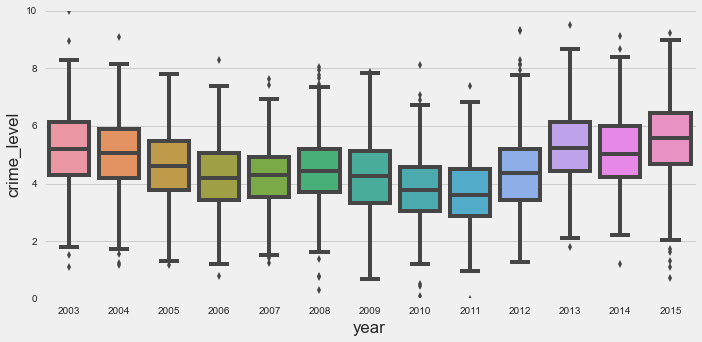

In [10]:
sb.factorplot(
    data = data,
    y = plot_feature,
    x = 'year',
    size=5, aspect=2,
    #hue = 'signup_method',   # row =   col =  hue =
    #row = 'language',
    kind = 'box'
);

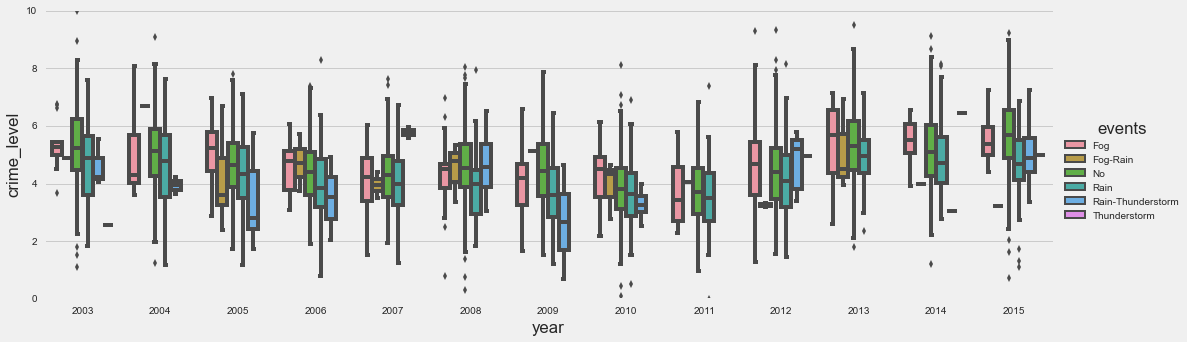

In [11]:
sb.factorplot(
    data = data,
    y = plot_feature,
    x = 'year',
    size=5, aspect=3,
    hue = 'events',   # row =   col =  hue =
    #row = 'language',
    kind = 'box'    # 'strip'  'violin' 'box'
);

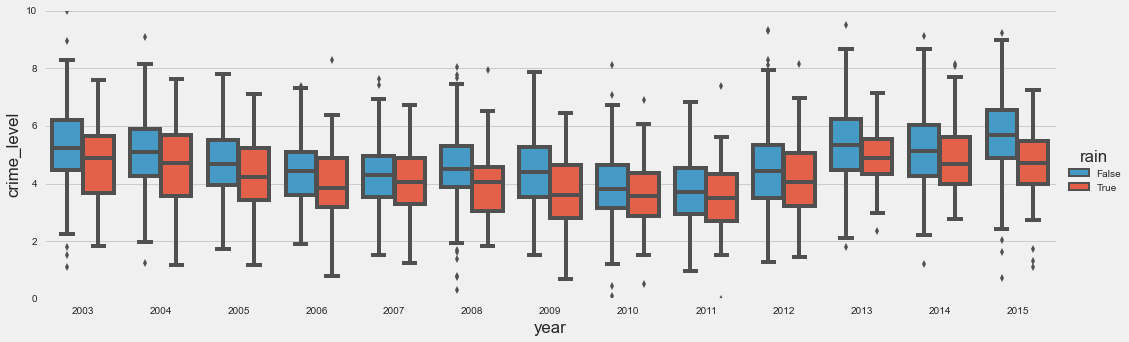

In [12]:
sb.factorplot(
    data = data,
    y = plot_feature,
    x = 'year',
    size=5, aspect=3,
    hue = 'rain',   # row =   col =  hue =
    #row = 'language',
    kind = 'box'    # 'strip'  'violin' 'box'
);

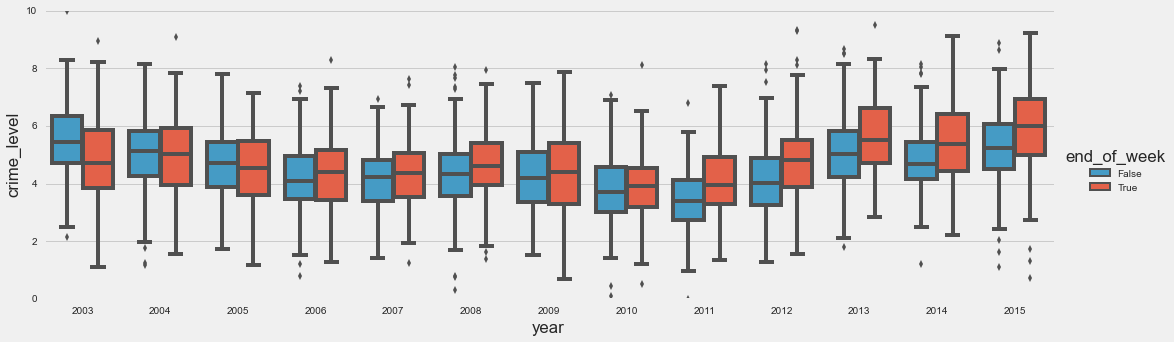

In [13]:
sb.factorplot(
    data = data,
    y = plot_feature,
    x = 'year',
    size=5, aspect=3,
    hue = 'end_of_week',   # row =   col =  hue =
    #row = 'language',
    kind = 'box'    # 'strip'  'violin' 'box'
);

In [29]:
data.sort_values('temp_max')
data.head(5)

,crime_level_sum,crime_level_count,weather_crime_sum,v_word_sum,gun_sum,dayofweek,day,month,year,end_of_week,...,events,wind_direction,rain,sun_length,moon_phase,sun_units,wind_chill_mean,wind_chill_max,heat_index,temp_apparent
2011-02-19,663,363,66,43,3,saturday,19,2,2011,True,...,Rain,38,True,659.533333,0.546709,85.739333,43,45,105.910373,58.363068
2007-01-12,720,403,57,56,4,friday,12,1,2007,True,...,No,347,False,588.933333,0.770406,588.933333,42,46,60.787461,38.602076
2007-12-28,720,376,81,62,6,friday,28,12,2007,True,...,Rain,68,True,576.583333,0.626555,0.000000,44,46,116.404188,61.916692
2009-12-09,641,338,70,52,5,wednesday,9,12,2009,False,...,No,77,False,579.450000,0.760054,289.725000,41,46,78.045786,50.248217
2005-01-13,785,415,70,70,3,thursday,13,1,2005,False,...,No,82,False,590.783333,0.097609,147.695833,44,46,131.917614,65.307872


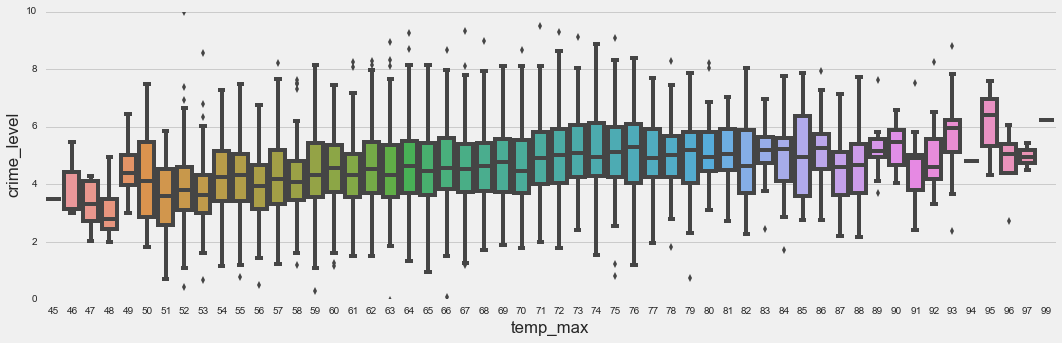

In [15]:
data.sort_values('temp_max', inplace=True)
sb.factorplot(
    data = data,
    y = plot_feature,
    x = 'temp_max',
    size=5, aspect=3,
    #hue = 'events',   # row =   col =  hue =
    #row = 'language',
    kind = 'box'    # 'strip'  'violin' 'box'
);

In [16]:
day_count = data.groupby(['day'])[['crime_level_count']].mean()
#day_level_sum = data.groupby(['day'])[['crime_level_sum']].mean()
day_level = data.groupby(['day'])[['crime_level']].mean()

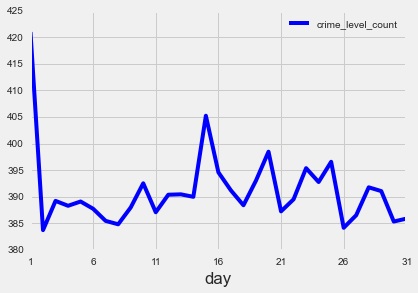

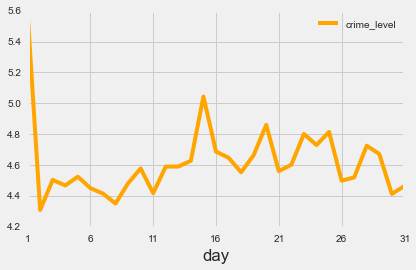

In [17]:
fig = plt.figure(figsize=(15,10))

day_count.plot( kind='line', color='blue')
day_level.plot( kind='line', color='orange')
plt.tight_layout();

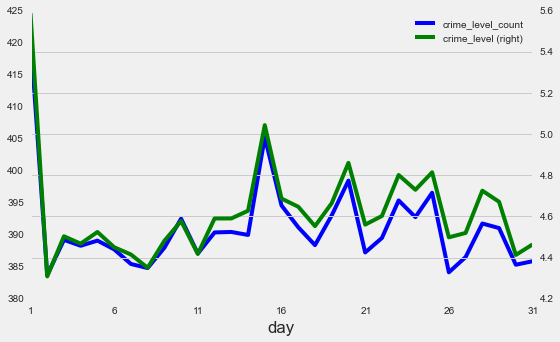

In [18]:
fig = plt.figure(figsize=(8,5))
ax = plt.subplot()
ax = day_count.plot(ax=ax, kind='line', color='blue')
day_level.plot(secondary_y=True, ax=ax, kind='line', color='green')
plt.tight_layout();

## Look at features that have integer values

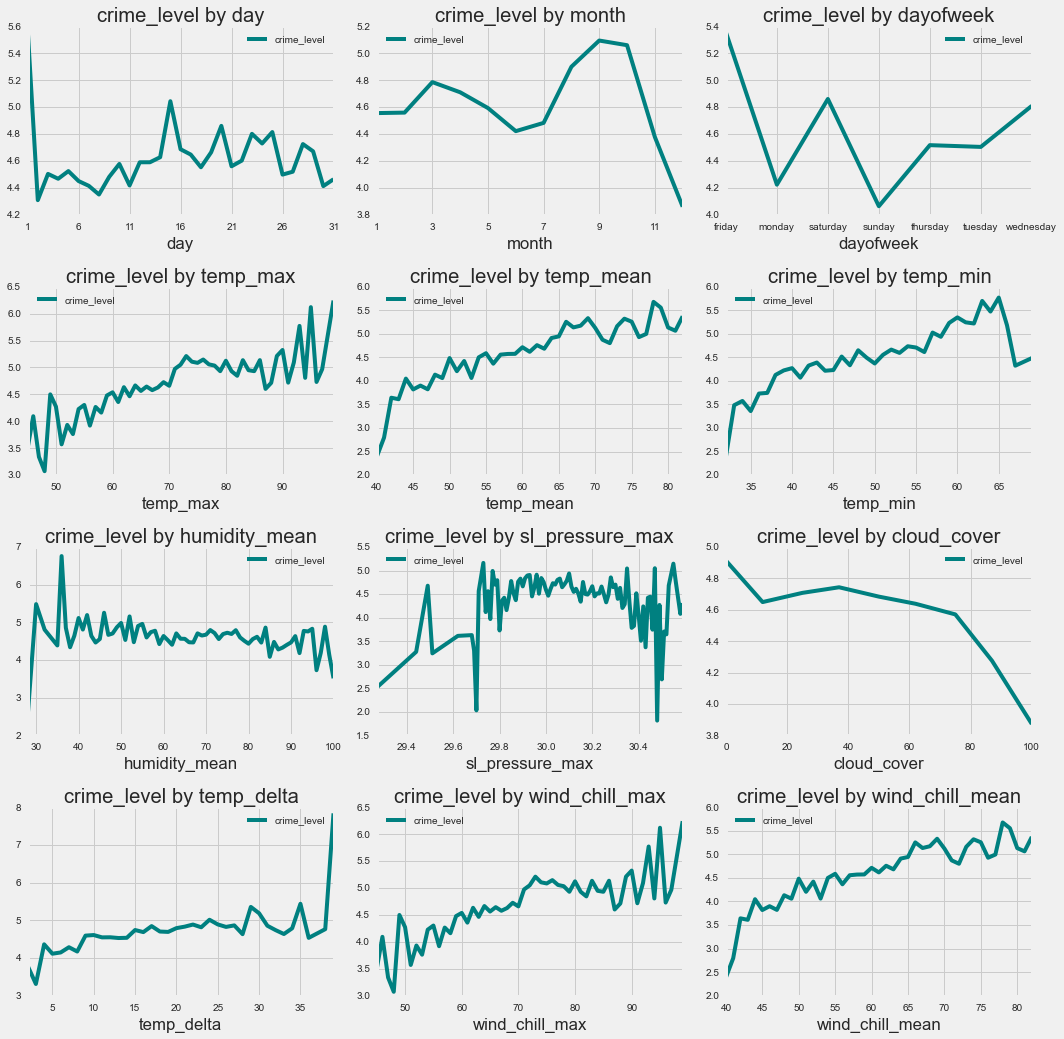

In [19]:
i_features = ['day','month','dayofweek', 'temp_max', 'temp_mean', 'temp_min', 
                 'humidity_mean', 'sl_pressure_max',
                 'cloud_cover', 'temp_delta',
                 'wind_chill_max', 'wind_chill_mean']
fig = plt.figure(figsize=(15,25))
for i, field in enumerate(i_features):
    ax = plt.subplot(7,3,i+1)
    plot_title = plot_feature + ' by ' + str(field)
    group = data.groupby([field])[[plot_feature]].mean()
    group.plot(ax=ax, kind='line', color='teal', title=plot_title)
#    plot_title = 'Test Positive ratio by ' + str(field)
plt.tight_layout();

### Look at features that need grouping

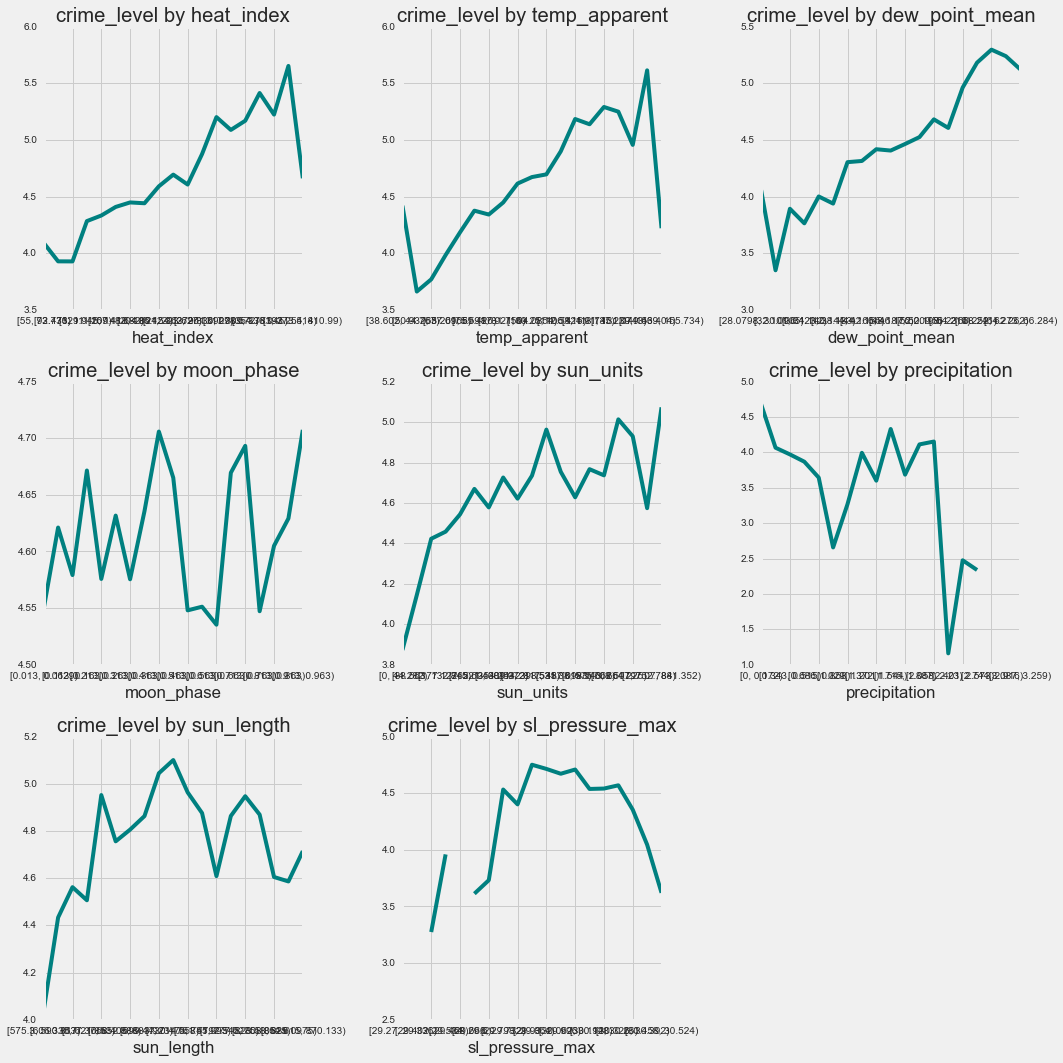

In [20]:
# plot features that need grouping
c_features = ['heat_index', 'temp_apparent', 'dew_point_mean', 'moon_phase', 'sun_units', 
              'precipitation', 'sun_length', 'sl_pressure_max']
fig = plt.figure(figsize=(15,15))
for i, field in enumerate(c_features):
    ax = plt.subplot(3,3,i+1)
    plot_title = plot_feature + ' by ' + str(field)
    high = data[field].max()
    low = data[field].min()
    step = (high-low)/20
    grouped = data.groupby(pd.cut(data[field], np.arange(low, high, step), right=False))
    positive_by_group = grouped.mean()
    positive_by_group[plot_feature].plot.line(ax=ax, color='teal', title= plot_title);
plt.tight_layout();

/Users/jsmithson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


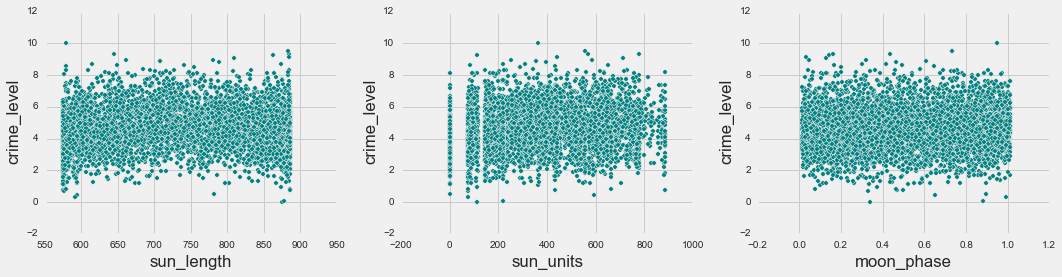

In [21]:
plot_features = ['sun_length', 'sun_units', 'moon_phase']
fig = plt.figure(figsize=(15,15))
for i, field in enumerate(plot_features):
    ax = plt.subplot(4,3,i+1)
#    group = data.groupby([field])[['crime_level']].mean()
    data.plot(ax=ax, x=field, y=plot_feature, kind='scatter', color='teal')
#    plot_title = 'Test Positive ratio by ' + str(field)
plt.tight_layout();

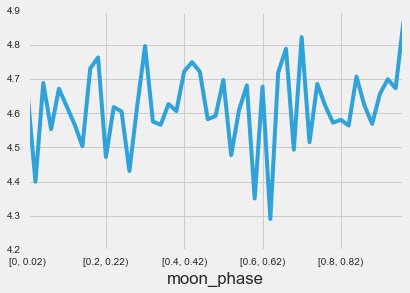

In [22]:
mphase_grouped = data.groupby(pd.cut(data['moon_phase'], np.arange(0, 1, .02), right=False))
qwert = mphase_grouped.mean()
qwert[plot_feature].plot.line();


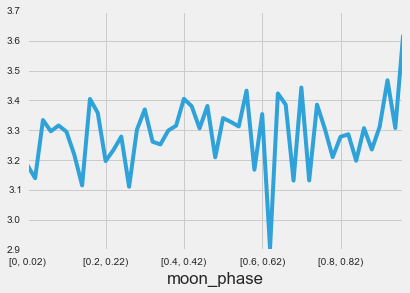

In [23]:
mphase_grouped = data.groupby(pd.cut(data['moon_phase'], np.arange(0, 1, .02), right=False))
qwert = mphase_grouped.mean()
qwert['weather_crime_level'].plot.line();



In [24]:
data[['sun_length', 'crime_level']].sort_values('sun_length', ascending=True).head(20)

,sun_length,crime_level
2004-12-21,575.300000,4.387097
2006-12-21,575.300000,2.467742
2008-12-21,575.300000,3.225806
2007-12-22,575.300000,3.370968
2005-12-21,575.300000,3.435484
2003-12-21,575.300000,4.451613
2007-12-21,575.300000,4.419355
2004-12-20,575.316667,4.193548
2005-12-22,575.316667,3.177419
2005-12-20,575.316667,3.112903


In [25]:
data[data['humidity_mean'] < 30].shape

(1, 40)

In [26]:
data[['humidity_mean', 'crime_level']].sort_values('humidity_mean', ascending=True).head(5)

,humidity_mean,crime_level
2011-11-02,28,2.483871
2013-11-22,30,5.483871
2010-10-12,32,4.806452
2009-11-29,35,3.387097
2008-10-12,35,5.387097


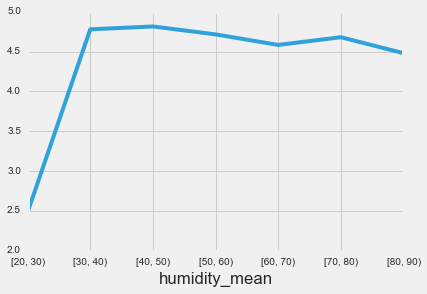

In [27]:
humid_grouped = data.groupby(pd.cut(data['humidity_mean'], np.arange(20, 100, 10), right=False))
qwert = humid_grouped.mean()
qwert['crime_level'].plot.line();

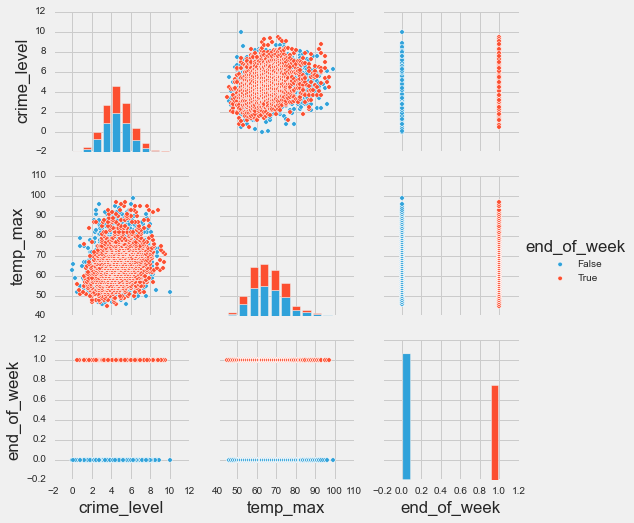

In [31]:
sb.pairplot(data[['crime_level','temp_max','end_of_week']], hue='end_of_week')

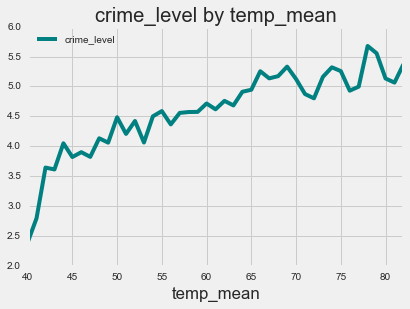

In [38]:
#fig = plt.figure(figsize=(15,25))
field = 'temp_mean'
plot_title = plot_feature + ' by ' + str(field)
group = data.groupby([field])[[plot_feature]].mean()
group.plot( kind='line', color='teal', title=plot_title)
#plt.tight_layout();

In [28]:
#fig = plt.figure(figsize=(7,5))
#ax = plt.subplot()
#temp_max_level_scale.plot(ax=ax, kind='line', color='blue')
#temp_mean_level_scale.plot(ax=ax, kind='line', color='green')
#temp_min_level_scale.plot(ax=ax, kind='line', color='orange')
#plt.tight_layout();

# Observations/Actions
[[back to top](#Sections)]

Observation|Probable Cause|Action|Location
----------|--------|-------|--------
There were two days that had almost no crime|Missing reports|Remove from raw data|2_clean_sf_crime
Several outliers in the data|found low days were holiday related|Remove from raw data|2_clean_sf_crime
Large number of crimes happened on 1st day of month|Wrong day recorded|Remove from raw data|2_clean_sf_crime
Large number of crimes occure on Fri, Sat, Sun|More free time and Partying|Create single end_of_week feature|2_clean_sf_crime